# Multiple Linear Regression - Raw Features

## Objectives

- Conduct multiple linear regressions in `statsmodels`
- Use standard scaling for linear regression for better interpretation

Bonus: comparing statsmodels and sklearn

## Regression with Multiple Predictors

> It's all a bunch of dials

<img width='450px' src='images/dials.png'/>

The main idea here is pretty simple. Whereas, in simple linear regression we took our dependent variable to be a function only of a single independent variable, here we'll be taking the dependent variable to be a function of multiple independent variables.

## Expanding Simple Linear Regression

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x_1 + ... + \hat{\beta}_nx_n$.

Remember that the hats ( $\hat{}$ ) indicate parameters that are estimated.

Is this still a best-fit *line*? Well, no. What does the graph of, say, z = x + y look like? [Here's](https://academo.org/demos/3d-surface-plotter/) a 3d-plotter. (Of course, once we get beyond two input variables it's going to be very hard to visualize. But in practice linear regressions can make use of dozens or even of hundreds of independent variables!)

## Confounding Variables

Suppose I have a simple linear regression that models the growth of corn plants as a function of the average temperature of the ambient air. And suppose there is a noticeable positive correlation between temperature and plant height.

In [1]:
# Imports!
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
corn = pd.read_csv('data/corn.csv', index_col=0)

In [3]:
corn.head()

,temp,humid,height
0,58.086965,49.848304,122.222368
1,70.582087,22.855446,110.079666
2,75.868571,72.856834,256.812528
3,74.732376,38.907566,167.889601
4,77.384666,42.570524,188.914312


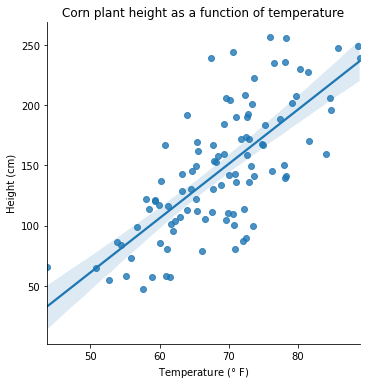

In [4]:
sns.lmplot(data=corn, x='temp', y='height')
plt.xlabel('Temperature ($\degree$ F)')
plt.ylabel('Height (cm)')
plt.title('Corn plant height as a function of temperature');

It seems that higher temperatures lead to taller corn plants. But it's hard to know for sure. One **confounding variable** might be *humidity*. If we haven't controlled for humidity, then it's difficult to draw conclusions.

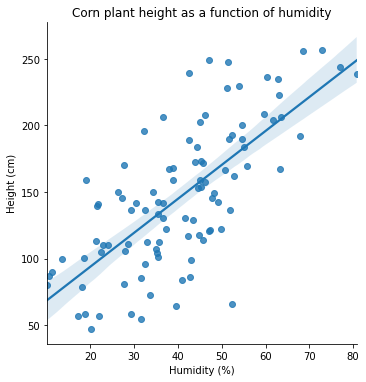

In [5]:
sns.lmplot(data=corn, x='humid', y='height')
plt.xlabel('Humidity (%)')
plt.ylabel('Height (cm)')
plt.title('Corn plant height as a function of humidity');

One solution is to use **both features** in a single model.

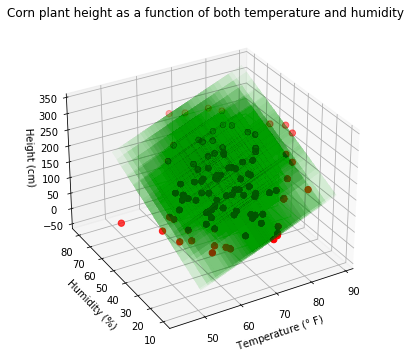

In [6]:
ax = plt.figure(figsize=(8, 6)).add_subplot(111, projection='3d')
ax.scatter(corn['temp'], corn['humid'], corn['height'],
           depthshade=True, s=40, color='#ff0000')
# create x,y
xx, yy = np.meshgrid(corn['temp'], corn['humid'])

# multiple linear regression model with both inputs
results = sm.OLS(corn['height'], sm.add_constant(corn[['temp', 'humid']])).fit()
# calculate corresponding z using parameters from the above model
z = results.params['temp'] * xx + results.params['humid'] * yy + results.params['const']

# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.01, color='#00ff00')

ax.view_init(30, azim=240)
ax.set_xlabel('Temperature ($\degree$ F)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Height (cm)')
plt.title('Corn plant height as a function of both temperature and humidity');

## Multiple Regression in `statsmodels` - Let's Practice!

### Diamonds Dataset

Our goal is to predict the sale price of diamonds. First, let's look at the data:

In [7]:
# Only loading in our numerical features - we'll learn about categorical features later
data = sns.load_dataset('diamonds').drop(['cut', 'color', 'clarity'], axis=1)

In [8]:
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [9]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Model-Less Baseline

Without modeling, what is a simple way we could predict the sale price of diamonds?

- Predict the average price for each diamond


In [10]:
# Code here to do that!
y_mean = data['price'].mean()

In [13]:
y_preds = [y_mean] * len(data)

In [14]:
from sklearn.metrics import r2_score

In [16]:
#We KNOW this will be zero...
r2_score(data['price'], y_preds)

0.0

#### Kitchen Sink Approach

One valid way to approach a regression problem like this is to just throw everything into the regression model, and see how it does compared to a model-less baseline (what I call the Kitchen Sink approach). We know this will likely violate some linear regression assumptions, however it's often easier to start here and then iterate to improve!

> You can contrast this against the approach of starting from a single variable and adding more in one by one

In [18]:
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [19]:
# Grab our X and y variables
X = data.drop(columns='price')
y = data['price']

In [21]:
# Create and fit our model
# Don't forget to add a constant!
model = sm.OLS(y, sm.add_constant(X)).fit()

In [22]:
# Check out our results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:52:05   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.085e+04    447.562     46.584      0.000       2e+04    2.17e+04
carat       1.069e+04     63.201    169.085      0.000    1.06e+04    1.08e+04
depth       -203.1541      5.504    -36.910      0.000    -213.942    -192.366
table       -102.4457      3.084    -33.216      0.000    -108.491     -96.401
x          -1315.6678     43.070    -30.547      0.000   -1400.086   -1231.250
y             66.3216     25.523      2.599      0.009      16.296     116.347
z             41.6277     44.305      0.940      0.347     -45.210     128.465
==============================================================================
Omnibus:                    14093.399   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373568.966
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                      15.822   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Evaluate

How'd we do?

- model scores well
- BUT there is some weirdness in coefficients - why are they negative?


#### Another way to evaluate: Statistically Significant Models

A quick note - we discussed some of the pieces of the statsmodels output yesterday, but I want to highlight the F-Statistic (and it's related p-value). This F-test measures the significance of your model relative to a model in which all coefficients are 0, i.e. relative to a model that says there is no correlation whatever between the predictors and the target.

Is our model statistically significant, at $\alpha = .05$ ?

- Yes, our p-val is lower than alpha (Prob F-Statistic)


### Now What?

Let's brainstorm: what would be a good next step if we wanted to do one thing to improve our model?

- See if variables share values, MULTICOLLINEARITY, do the inputs variables correlate?


In [26]:
X.corr()

,carat,depth,table,x,y,z
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


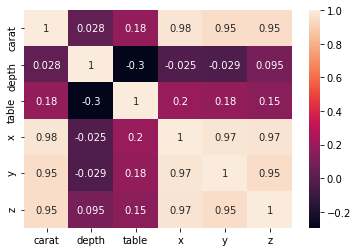

In [25]:
sns.heatmap(X.corr(), annot=True);

In [27]:
# Code here to do that next step
X_new = data[['carat', 'depth', 'table']]

In [29]:
model_new = sm.OLS(y, sm.add_constant(X_new)).fit()

In [30]:
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.049e+05
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:09:07   Log-Likelihood:            -4.7194e+05
No. Observations:               53940   AIC:                         9.439e+05
Df Residuals:                   53936   BIC:                         9.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.3e+04    390.918     33.264      0.000    1.22e+04    1.38e+04
carat       7858.7705     14.151    555.356      0.000    7831.035    7886.506
depth       -151.2363      4.820    -31.378      0.000    -160.683    -141.789
table       -104.4728      3.141    -33.259      0.000    -110.630     -98.316
==============================================================================
Omnibus:                    14107.737   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           154392.067
Skew:                           0.945   Prob(JB):                         0.00
Kurtosis:                      11.070   Cond. No.                     5.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Scaling - The Missing & Helpful Step

When you looked at the summary after we did the linear regression, you might have noticed something interesting.

Observing the coefficients, you might notice there are two relatively large coefficients, and then two others smaller than 100:

In [31]:
# May need to change this varaible if you didn't name your fit model 'model'
model.params

const    20849.316413
carat    10686.309081
depth     -203.154052
table     -102.445652
x        -1315.667842
y           66.321602
z           41.627697
dtype: float64

And if we go back and describe our X variables, you can check out each column's min and max values, and see that they're all on different scales:

In [32]:
X.describe()

,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


## What's Going on Here?

In a word, it's useful to have all of our variables be on the same scale, so that the resulting coefficients are easier to interpret. If the scales of the variables are very different one from another, then some of the coefficients may end up on very large or very tiny scales.

This happens since the coefficients will effectively attempt to "shrink" or "expand" the features before factoring their importance to the model.

This can make it more difficult for interpretation and identifying coefficients with the most "effect" on the prediction.

For more on this, see [this post](https://stats.stackexchange.com/questions/32649/some-of-my-predictors-are-on-very-different-scales-do-i-need-to-transform-them).

## A Solution: Standard Scaling

One solution is to *scale* our features. There are a few ways to do this but we'll focus on **standard scaling**.

When we do **standard scaling**, we're really scaling it to be the features' respective $z$-scores.

Benefits:

- This tends to make values relatively small (mean value is at $0$ and one standard deviation $\sigma$ from the mean is $1$).
- Easier interpretation: larger coefficients tend to be more influential

Let's model our data again, but let's *scale* our columns as $z$-scores first. 

##  Redoing with Standard Scaling

Let's try standard scaling the model with our wine dataset now.

In [33]:
# First need to import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

In [34]:
# Need to instantiate our scaler
scaler = StandardScaler()
# Then we can fit it
scaler.fit(X)
# And transform our X values to scaled X values
X_scaled = scaler.transform(X)

In [35]:
# Check it out
pd.DataFrame(X_scaled, columns=X.columns).describe()

,carat,depth,table,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,2.444878e-16,-3.996902e-15,9.695207e-17,2.782103e-16,-8.430615e-17,-2.002271e-16
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261458e+00,-1.308760e+01,-6.470073e+00,-5.109120e+00,-5.020931e+00,-5.014556e+00
25%,-8.395232e-01,-5.231053e-01,-6.521385e-01,-9.103248e-01,-8.882800e-01,-8.909461e-01
50%,-2.066210e-01,3.531678e-02,-2.046051e-01,-2.777553e-02,-2.147398e-02,-1.237618e-02
75%,5.106683e-01,5.239361e-01,6.904618e-01,7.210542e-01,7.052421e-01,7.103184e-01
max,8.886075e+00,1.204139e+01,1.680167e+01,4.465203e+00,4.654965e+01,4.004758e+01


In [36]:
# Now let's model (don't forget to add a constant!)
model_scaled = sm.OLS(y, sm.add_constant(X_scaled)).fit()

In [37]:
# Check our results
model_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:24:55   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3932.7997      6.445    610.167      0.000    3920.167    3945.433
x1          5065.3837     29.958    169.085      0.000    5006.667    5124.101
x2          -291.0401      7.885    -36.910      0.000    -306.495    -275.585
x3          -228.9117      6.892    -33.216      0.000    -242.419    -215.404
x4         -1475.8509     48.314    -30.547      0.000   -1570.547   -1381.155
x5            75.7475     29.150      2.599      0.009      18.612     132.883
x6            29.3763     31.265      0.940      0.347     -31.904      90.657
==============================================================================
Omnibus:                    14093.399   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373568.966
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                      15.822   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Evaluate

Compare how well this model did with the one before scaling. Does it perform any differently?

- Does not change or R-squared
- Does change our coefficient


## Other Scalers in SKLearn

#### [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

The most common method of scaling is standardization.  In this method we center the data, then we divide by the standard devation to enforce that the standard deviation of the variable is one.

#### [MinMax Scalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

From the documentation:

> This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

#### [Robust Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

From the documentation:

> Scale features using statistics that are robust to outliers.
>
> This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Aka like a standard scaler, but uses median and IQR variance instead of mean and standard deviation.

In [38]:
# Importing the other options so we can check out the differences between them
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [39]:
# Instantiating our different scalers
stdscaler = StandardScaler()
minmaxscaler = MinMaxScaler()
robscaler = RobustScaler()

# Creating scaled versions of one column
X_scaled_std = stdscaler.fit_transform(X['carat'].values.reshape(-1, 1))
X_scaled_mm = minmaxscaler.fit_transform(X['carat'].values.reshape(-1, 1))
X_scaled_rob = robscaler.fit_transform(X['carat'].values.reshape(-1, 1))
# why fit_transform? We'll discuss in a second

# defining a dictionary of these things to better visualize
scalers = {'Original': X['carat'].values, 
           'Standard Scaler': X_scaled_std, 
           'Min Max Scaler': X_scaled_mm,
           'Robust Scaler': X_scaled_rob}

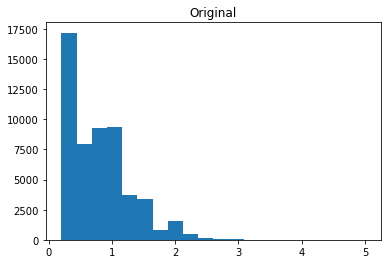

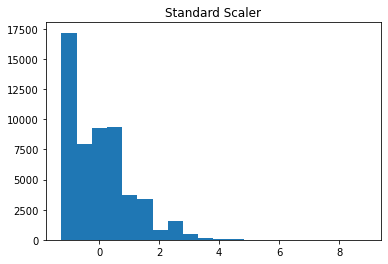

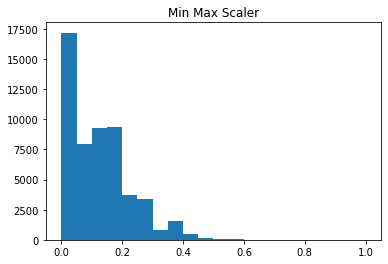

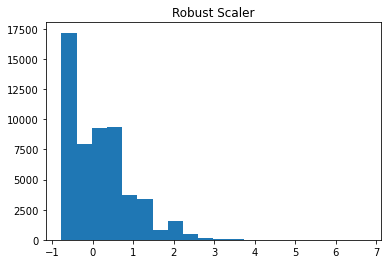

In [40]:
# visualize it!
for title, data in scalers.items():
    plt.hist(data, bins=20)
    plt.title(f"{title}")
    plt.show()

### Discuss:

What differences do you see between these?

- No difference in distribution
- Changes scale of X-axis


### Recap: Why do we need to use feature scaling?

- In order to compare the magnitude of coefficients thus increasing the interpretability of coefficients
- Handling disparities in units
- Some models use euclidean distance in their computations
- Some models require features to be on equivalent scales
- In the machine learning space, it helps improve the performance of the model and reducing the values/models from varying widely
- Some algorithms are sensitive to the scale of the data

## Modeling Libraries: Statmodels VS Sci-kit Learn

## Statsmodels' `OLS`

Aka y vs X version - what we've been doing so far

In [41]:
# Import
import statsmodels.api as sm

In [42]:
# Now we'll use our X_train_scaled and y_train!
# Note the add constant
model_OLS = sm.OLS(endog=y, exog=sm.add_constant(X_scaled)).fit()

In [43]:
# Check your results!
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:32:13   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3932.7997      6.445    610.167      0.000    3920.167    3945.433
x1          5065.3837     29.958    169.085      0.000    5006.667    5124.101
x2          -291.0401      7.885    -36.910      0.000    -306.495    -275.585
x3          -228.9117      6.892    -33.216      0.000    -242.419    -215.404
x4         -1475.8509     48.314    -30.547      0.000   -1570.547   -1381.155
x5            75.7475     29.150      2.599      0.009      18.612     132.883
x6            29.3763     31.265      0.940      0.347     -31.904      90.657
==============================================================================
Omnibus:                    14093.399   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373568.966
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                      15.822   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## And Now - SKLearn!

Aka the no-summary version

In [44]:
# Import
from sklearn.linear_model import LinearRegression

In [45]:
# Instantiate our model
model_sk = LinearRegression()

In [46]:
# Fit our model - X FIRST THEN Y!  <<<
model_sk.fit(X_scaled, y)

LinearRegression()

In [47]:
# Get our R2 score
model_sk.score(X_scaled, y)

0.8592186831580986

In [48]:
# Can also use:
y_preds = model_sk.predict(X_scaled)

r2_score(y, y_preds)

0.8592186831580986

In [49]:
# Check our coefficients
model_sk.coef_

array([ 5065.38371089,  -291.04012862,  -228.91172094, -1475.85086008,
          75.7474995 ,    29.37634547])

In [50]:
# Add the column names to look at
dict(zip(X.columns, model_sk.coef_))

{'carat': 5065.383710885739,
 'depth': -291.04012861822423,
 'table': -228.91172094235233,
 'x': -1475.8508600758928,
 'y': 75.7474994987913,
 'z': 29.376345474998946}

#### So What?

Feel free to use either implementation of Ordinary Least Squares regression on your projects - but please follow instructions on checkpoints and code challenges!

StatsModels has a great summary to help us get a feel for our models. BUT SKLearn is a much more robust library of machine learning models, and is considered the industry standard. 